In [1]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
env.Solarread()
B=np.zeros((100,4))    

def dense(x,a,b):
    results=(x.dot(a)+b)
    return results

def choose_action(s):
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)
    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a

for snr in range (-10,-8,2):

    for epoch in range (0,1750,30):

        modulation=0

        tf.reset_default_graph()
        graph = tf.get_default_graph()
        
        saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
        with tf.Session() as sess:
            saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

            a1 = sess.run('Actor/eval_net/l1/kernel:0')
            b1 = sess.run('Actor/eval_net/l1/bias:0')
            a3 = sess.run('Actor/eval_net/l3/kernel:0')
            b3 = sess.run('Actor/eval_net/l3/bias:0')
            aa = sess.run('Actor/eval_net/a/a/kernel:0')
            ba = sess.run('Actor/eval_net/a/a/bias:0')
    

    
            for i in range(MAX_EPISODES):

                s = env.reset_P2P(snr=snr)
                s=np.reshape(s,(1,-1))
                ep_reward = 0
                for j in range(MAX_EP_STEPS):
                    s=np.array(s,dtype=float)
                    a=choose_action(s)
                    s_, r, info = env.step_P2P([a,modulation])
                    s = s_
                    ep_reward += r
                    if (j+1)%10000==0:
                        print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
          
                index=(snr+10)/2
                B[int(index),int(modulation)]=ep_reward/j
                print(B[int(index),int(modulation)])



Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-100epoch=1999_P2P.ckpt


I0000 00:00:1732833756.139955  243944 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/client/session.py:1483: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return tf_session.TF_SessionRun_wrapper(self._session, options, feed_dict,


ValueError: Argument `fetch` = Actor/eval_net/a/a/kernel:0 cannot be interpreted as a Tensor. ("The name 'Actor/eval_net/a/a/kernel:0' refers to a Tensor which does not exist. The operation, 'Actor/eval_net/a/a/kernel', does not exist in the graph.")

In [3]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
env.Solarread()
B=np.zeros((100,4))    

def dense(x,a,b):
    #new
    # Ensure all inputs are NumPy arrays
    x = np.array(x, dtype=float)
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)

    # Check shapes for debugging
    # print(f"x shape: {x.shape}, a shape: {a.shape}, b shape: {b.shape}")

    results=(x.dot(a)+b)
    return results

def choose_action(s):
    # Debug input shape
    # print(f"choose_action() - input s shape: {s.shape}")

    # # Fix input shape mismatch if necessary
    # if s.shape[1] != a1.shape[0]:
    #     print(f"Padding input s from shape {s.shape} to match a1 shape {a1.shape}")
    #     s = np.pad(s, ((0, 0), (0, a1.shape[0] - s.shape[1])), 'constant')
    
   
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)

    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a


snr=-10
epoch=1999
modulation=0

tf.reset_default_graph()
graph = tf.get_default_graph()

saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
with tf.Session() as sess:
    saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

    # for op in tf.get_default_graph().get_operations():
    #     print(op.name, [tensor.shape for tensor in op.outputs])
    

    # Retrieve tensors and reshape to match expected dimensions
    a1 = sess.run('Actor/eval_net/l1/kernel:0')
    b1 = sess.run('Actor/eval_net/l1/bias:0')
    a3 = sess.run('Actor/eval_net/l3/kernel:0')
    b3 = sess.run('Actor/eval_net/l3/bias:0')
    aa = sess.run('Actor/eval_net/a/kernel:0')
    ba = sess.run('Actor/eval_net/a/bias:0')

    # print(f"Shape a1: {a1.shape}, Shape b1: {b1.shape}")
    # print(f"Shape a3: {a3.shape}, Shape b3: {b3.shape}")
    # print(f"Shape aa: {aa.shape}, Shape ba: {ba.shape}")

    # Dynamically adjust dimensions
    input_dim = 3
    output_dim = 1

    # Compute hidden dimensions dynamically
    hidden_dim1 = a1.size // input_dim
    if a1.size % input_dim == 0:
        a1 = a1.reshape(input_dim, hidden_dim1)
    else:
        raise ValueError(f"Cannot reshape a1 with size {a1.size} into ({input_dim}, hidden_dim1)")

    hidden_dim2 = a3.size // hidden_dim1
    if a3.size % hidden_dim1 == 0:
        a3 = a3.reshape(hidden_dim1, hidden_dim2)
    else:
        raise ValueError(f"Cannot reshape a3 with size {a3.size} into ({hidden_dim1}, hidden_dim2)")

    # Reshape biases dynamically
    if b1.size >= hidden_dim1:
        b1 = b1[:hidden_dim1]  # Slice to match hidden_dim1
    else:
        raise ValueError(f"Cannot reshape b1 with size {b1.size} into ({hidden_dim1},)")

    if b3.size >= hidden_dim2:
        b3 = b3[:hidden_dim2]  # Slice to match hidden_dim2
    else:
        raise ValueError(f"Cannot reshape b3 with size {b3.size} into ({hidden_dim2},)")

    if ba.size >= output_dim:
        ba = ba[:output_dim]  # Slice to match output_dim
    else:
        raise ValueError(f"Cannot reshape ba with size {ba.size} into ({output_dim},)")

    # Reshape output layer weights
    if aa.size >= hidden_dim2 * output_dim:
        aa = aa[:hidden_dim2 * output_dim].reshape(hidden_dim2, output_dim)
    else:
        raise ValueError(f"Cannot reshape aa with size {aa.size} into ({hidden_dim2}, {output_dim})")

    # a1 = a1.reshape(input_dim, hidden_dim1)
    # b1 = b1.reshape(hidden_dim1)
    # a3 = a3.reshape(hidden_dim1, hidden_dim2)
    # b3 = b3.reshape(hidden_dim2)
    # aa = aa.reshape(hidden_dim2, output_dim)
    # ba = ba.reshape(output_dim)
    
    # # Reshape
    # print(f"Reshaped a1: {a1.shape}, Reshaped b1: {b1.shape}")
    # print(f"Reshaped a3: {a3.shape}, Reshaped b3: {b3.shape}")
    # print(f"Reshaped aa: {aa.shape}, Reshaped ba: {ba.shape}")

    for i in range(MAX_EPISODES):

        s = env.reset_P2P(snr=snr)
        s=np.reshape(s,(1,-1))
        ep_reward = 0
        for j in range(MAX_EP_STEPS):
            s=np.array(s,dtype=float)
            a=choose_action(s)
            s_, r, info = env.step_P2P([a,modulation])
            s = s_
            ep_reward += r
            if (j+1)%10000==0:
                print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
    
        index=(snr+10)/2
        B[int(index),int(modulation)]=ep_reward/j
        print(B[int(index),int(modulation)])

INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-100epoch=1999_P2P.ckpt


/var/folders/yd/0j058frj781_p8p0d_z_jkxh0000gp/T/ipykernel_48113/3540547475.py:55: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-a))


net bit rate= 19011.679435104754 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21338.79836213287 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21936.615485440852 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21226.6695211434 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20805.765094082057 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20453.002982897902 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21116.767773178814 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21136.91274490488 snr= -10 modulation= 0 loop = 0 action= [0.] noise= 10.0
net bit rate= 21254.6077308788 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21038.743658442476 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
21038.743658442476


In [7]:
print(B)

[[ 21018.70658709      0.              0.              0.        ]
 [ 43380.71708674      0.              0.              0.        ]
 [ 71373.63500421      0.              0.              0.        ]
 [100177.14876499      0.              0.              0.        ]
 [125891.70102903      0.              0.              0.        ]
 [147399.46394407      0.              0.              0.        ]
 [162951.42615351      0.              0.              0.        ]
 [176119.77091002      0.              0.              0.        ]
 [183543.78417937      0.              0.              0.        ]
 [188903.47950024      0.              0.              0.        ]
 [     0.              0.              0.              0.        ]
 [     0.              0.              0.              0.        ]
 [     0.              0.              0.              0.        ]
 [     0.              0.              0.              0.        ]
 [     0.              0.              0.              0.     

In [8]:
np.savetxt("DDPG_P2P_noise2"+str(snr)+".csv", B, delimiter = ',')

In [3]:
import keras as k
k.__version__

'3.7.0'

## Testing with varying snr

In [6]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
#env.Solarread()
env.Solartest()
B=np.zeros((100,4))    

def dense(x,a,b):
    #new
    # Ensure all inputs are NumPy arrays
    x = np.array(x, dtype=float)
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)

    # Check shapes for debugging
    # print(f"x shape: {x.shape}, a shape: {a.shape}, b shape: {b.shape}")

    results=(x.dot(a)+b)
    return results

def choose_action(s):
    # Debug input shape
    # print(f"choose_action() - input s shape: {s.shape}")

    # # Fix input shape mismatch if necessary
    # if s.shape[1] != a1.shape[0]:
    #     print(f"Padding input s from shape {s.shape} to match a1 shape {a1.shape}")
    #     s = np.pad(s, ((0, 0), (0, a1.shape[0] - s.shape[1])), 'constant')
    
   
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)

    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a

for snr in range (-10,10,2):
    #for epoch in range (0,1750,30):
    epoch=1999
    modulation=0

    tf.reset_default_graph()
    graph = tf.get_default_graph()

    saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
    with tf.Session() as sess:
        saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

        # for op in tf.get_default_graph().get_operations():
        #     print(op.name, [tensor.shape for tensor in op.outputs])
        

        # Retrieve tensors and reshape to match expected dimensions
        a1 = sess.run('Actor/eval_net/l1/kernel:0')
        b1 = sess.run('Actor/eval_net/l1/bias:0')
        a3 = sess.run('Actor/eval_net/l3/kernel:0')
        b3 = sess.run('Actor/eval_net/l3/bias:0')
        aa = sess.run('Actor/eval_net/a/kernel:0')
        ba = sess.run('Actor/eval_net/a/bias:0')

        # print(f"Shape a1: {a1.shape}, Shape b1: {b1.shape}")
        # print(f"Shape a3: {a3.shape}, Shape b3: {b3.shape}")
        # print(f"Shape aa: {aa.shape}, Shape ba: {ba.shape}")

        # Dynamically adjust dimensions
        input_dim = 3
        output_dim = 1

        # Compute hidden dimensions dynamically
        hidden_dim1 = a1.size // input_dim
        if a1.size % input_dim == 0:
            a1 = a1.reshape(input_dim, hidden_dim1)
        else:
            raise ValueError(f"Cannot reshape a1 with size {a1.size} into ({input_dim}, hidden_dim1)")

        hidden_dim2 = a3.size // hidden_dim1
        if a3.size % hidden_dim1 == 0:
            a3 = a3.reshape(hidden_dim1, hidden_dim2)
        else:
            raise ValueError(f"Cannot reshape a3 with size {a3.size} into ({hidden_dim1}, hidden_dim2)")

        # Reshape biases dynamically
        if b1.size >= hidden_dim1:
            b1 = b1[:hidden_dim1]  # Slice to match hidden_dim1
        else:
            raise ValueError(f"Cannot reshape b1 with size {b1.size} into ({hidden_dim1},)")

        if b3.size >= hidden_dim2:
            b3 = b3[:hidden_dim2]  # Slice to match hidden_dim2
        else:
            raise ValueError(f"Cannot reshape b3 with size {b3.size} into ({hidden_dim2},)")

        if ba.size >= output_dim:
            ba = ba[:output_dim]  # Slice to match output_dim
        else:
            raise ValueError(f"Cannot reshape ba with size {ba.size} into ({output_dim},)")

        # Reshape output layer weights
        if aa.size >= hidden_dim2 * output_dim:
            aa = aa[:hidden_dim2 * output_dim].reshape(hidden_dim2, output_dim)
        else:
            raise ValueError(f"Cannot reshape aa with size {aa.size} into ({hidden_dim2}, {output_dim})")

        # a1 = a1.reshape(input_dim, hidden_dim1)
        # b1 = b1.reshape(hidden_dim1)
        # a3 = a3.reshape(hidden_dim1, hidden_dim2)
        # b3 = b3.reshape(hidden_dim2)
        # aa = aa.reshape(hidden_dim2, output_dim)
        # ba = ba.reshape(output_dim)
        
        # # Reshape
        # print(f"Reshaped a1: {a1.shape}, Reshaped b1: {b1.shape}")
        # print(f"Reshaped a3: {a3.shape}, Reshaped b3: {b3.shape}")
        # print(f"Reshaped aa: {aa.shape}, Reshaped ba: {ba.shape}")

        for i in range(MAX_EPISODES):

            s = env.reset_P2P(snr=snr)
            s=np.reshape(s,(1,-1))
            ep_reward = 0
            for j in range(MAX_EP_STEPS):
                s=np.array(s,dtype=float)
                a=choose_action(s)
                s_, r, info = env.step_P2P([a,modulation])
                s = s_
                ep_reward += r
                if (j+1)%10000==0:
                    print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
        
            index=(snr+10)/2
            B[int(index),int(modulation)]=ep_reward/j
            print(B[int(index),int(modulation)])

INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-100epoch=1999_P2P.ckpt


/var/folders/yd/0j058frj781_p8p0d_z_jkxh0000gp/T/ipykernel_48113/1573092899.py:55: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-a))


net bit rate= 21967.441317868983 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21653.46637952835 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21023.092367066965 snr= -10 modulation= 0 loop = 0 action= [0.] noise= 10.0
net bit rate= 20758.184029513613 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20482.857014457313 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20941.69517684815 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20957.545372022243 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20878.42356232524 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21139.652863081556 snr= -10 modulation= 0 loop = 0 action= [0.] noise= 10.0
net bit rate= 21018.706587090062 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
21018.706587090062
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-80epo

In [1]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
#env.Solarread()
env.Solartest()
B=np.zeros((100,4))    

def dense(x,a,b):
    #new
    # Ensure all inputs are NumPy arrays
    x = np.array(x, dtype=float)
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)

    # Check shapes for debugging
    # print(f"x shape: {x.shape}, a shape: {a.shape}, b shape: {b.shape}")

    results=(x.dot(a)+b)
    return results

def choose_action(s):
    # Debug input shape
    # print(f"choose_action() - input s shape: {s.shape}")

    # # Fix input shape mismatch if necessary
    # if s.shape[1] != a1.shape[0]:
    #     print(f"Padding input s from shape {s.shape} to match a1 shape {a1.shape}")
    #     s = np.pad(s, ((0, 0), (0, a1.shape[0] - s.shape[1])), 'constant')
    
   
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)

    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a

for snr in range (-10,10,2):
    #for epoch in range (0,1750,30):
    epoch=1999
    modulation=0

    tf.reset_default_graph()
    graph = tf.get_default_graph()

    saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
    with tf.Session() as sess:
        saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

        # for op in tf.get_default_graph().get_operations():
        #     print(op.name, [tensor.shape for tensor in op.outputs])
        

        # Retrieve tensors and reshape to match expected dimensions
        a1 = sess.run('Actor/eval_net/l1/kernel:0')
        b1 = sess.run('Actor/eval_net/l1/bias:0')
        a3 = sess.run('Actor/eval_net/l3/kernel:0')
        b3 = sess.run('Actor/eval_net/l3/bias:0')
        aa = sess.run('Actor/eval_net/a/kernel:0')
        ba = sess.run('Actor/eval_net/a/bias:0')

        # print(f"Shape a1: {a1.shape}, Shape b1: {b1.shape}")
        # print(f"Shape a3: {a3.shape}, Shape b3: {b3.shape}")
        # print(f"Shape aa: {aa.shape}, Shape ba: {ba.shape}")

        # Dynamically adjust dimensions
        input_dim = 3
        output_dim = 1

        # Compute hidden dimensions dynamically
        hidden_dim1 = a1.size // input_dim
        if a1.size % input_dim == 0:
            a1 = a1.reshape(input_dim, hidden_dim1)
        else:
            raise ValueError(f"Cannot reshape a1 with size {a1.size} into ({input_dim}, hidden_dim1)")

        hidden_dim2 = a3.size // hidden_dim1
        if a3.size % hidden_dim1 == 0:
            a3 = a3.reshape(hidden_dim1, hidden_dim2)
        else:
            raise ValueError(f"Cannot reshape a3 with size {a3.size} into ({hidden_dim1}, hidden_dim2)")

        # Reshape biases dynamically
        if b1.size >= hidden_dim1:
            b1 = b1[:hidden_dim1]  # Slice to match hidden_dim1
        else:
            raise ValueError(f"Cannot reshape b1 with size {b1.size} into ({hidden_dim1},)")

        if b3.size >= hidden_dim2:
            b3 = b3[:hidden_dim2]  # Slice to match hidden_dim2
        else:
            raise ValueError(f"Cannot reshape b3 with size {b3.size} into ({hidden_dim2},)")

        if ba.size >= output_dim:
            ba = ba[:output_dim]  # Slice to match output_dim
        else:
            raise ValueError(f"Cannot reshape ba with size {ba.size} into ({output_dim},)")

        # Reshape output layer weights
        if aa.size >= hidden_dim2 * output_dim:
            aa = aa[:hidden_dim2 * output_dim].reshape(hidden_dim2, output_dim)
        else:
            raise ValueError(f"Cannot reshape aa with size {aa.size} into ({hidden_dim2}, {output_dim})")

        # a1 = a1.reshape(input_dim, hidden_dim1)
        # b1 = b1.reshape(hidden_dim1)
        # a3 = a3.reshape(hidden_dim1, hidden_dim2)
        # b3 = b3.reshape(hidden_dim2)
        # aa = aa.reshape(hidden_dim2, output_dim)
        # ba = ba.reshape(output_dim)
        
        # # Reshape
        # print(f"Reshaped a1: {a1.shape}, Reshaped b1: {b1.shape}")
        # print(f"Reshaped a3: {a3.shape}, Reshaped b3: {b3.shape}")
        # print(f"Reshaped aa: {aa.shape}, Reshaped ba: {ba.shape}")

        for i in range(MAX_EPISODES):

            s = env.reset_P2P(snr=snr)
            s=np.reshape(s,(1,-1))
            ep_reward = 0
            for j in range(MAX_EP_STEPS):
                s=np.array(s,dtype=float)
                a=choose_action(s)
                s_, r, info = env.step_P2P([a,modulation])
                s = s_
                ep_reward += r
                if (j+1)%10000==0:
                    print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
        
            index=(snr+10)/2
            B[int(index),int(modulation)]=ep_reward/j
            print(B[int(index),int(modulation)])

Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-100epoch=1999_P2P.ckpt


I0000 00:00:1733178603.459964 1326643 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/client/session.py:1483: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return tf_session.TF_SessionRun_wrapper(self._session, options, feed_dict,
/var/folders/yd/0j058frj781_p8p0d_z_jkxh0000gp/T/ipykernel_59251/4234698111.py:56: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-a))


net bit rate= 19486.32590456531 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20350.90177087867 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20802.51372397616 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20803.54124853436 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20584.091791601884 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20770.331275146746 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20853.1989566179 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20759.436938145936 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20986.71231300023 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21136.299943755603 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
21136.299943755603
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-80epoch=1

## Testing with multiple SNR and Modulation (QPSK, 8PSK, 16-QAM)

In [3]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
#env.Solarread()
env.Solartest()
B=np.zeros((100,4))    

def dense(x,a,b):
    #new
    # Ensure all inputs are NumPy arrays
    x = np.array(x, dtype=float)
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)

    # Check shapes for debugging
    # print(f"x shape: {x.shape}, a shape: {a.shape}, b shape: {b.shape}")

    results=(x.dot(a)+b)
    return results

def choose_action(s):
    # Debug input shape
    # print(f"choose_action() - input s shape: {s.shape}")

    # # Fix input shape mismatch if necessary
    # if s.shape[1] != a1.shape[0]:
    #     print(f"Padding input s from shape {s.shape} to match a1 shape {a1.shape}")
    #     s = np.pad(s, ((0, 0), (0, a1.shape[0] - s.shape[1])), 'constant')
    
   
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)

    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a


for modulation in range(0,3):
    for snr in range (-10,22,2):
        #for epoch in range (0,1750,30):
        epoch=1999
        #modulation=0

        tf.reset_default_graph()
        graph = tf.get_default_graph()

        saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
        with tf.Session() as sess:
            saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

            # for op in tf.get_default_graph().get_operations():
            #     print(op.name, [tensor.shape for tensor in op.outputs])
            

            # Retrieve tensors and reshape to match expected dimensions
            a1 = sess.run('Actor/eval_net/l1/kernel:0')
            b1 = sess.run('Actor/eval_net/l1/bias:0')
            a3 = sess.run('Actor/eval_net/l3/kernel:0')
            b3 = sess.run('Actor/eval_net/l3/bias:0')
            aa = sess.run('Actor/eval_net/a/kernel:0')
            ba = sess.run('Actor/eval_net/a/bias:0')

            # print(f"Shape a1: {a1.shape}, Shape b1: {b1.shape}")
            # print(f"Shape a3: {a3.shape}, Shape b3: {b3.shape}")
            # print(f"Shape aa: {aa.shape}, Shape ba: {ba.shape}")

            # Dynamically adjust dimensions
            input_dim = 3
            output_dim = 1

            # Compute hidden dimensions dynamically
            hidden_dim1 = a1.size // input_dim
            if a1.size % input_dim == 0:
                a1 = a1.reshape(input_dim, hidden_dim1)
            else:
                raise ValueError(f"Cannot reshape a1 with size {a1.size} into ({input_dim}, hidden_dim1)")

            hidden_dim2 = a3.size // hidden_dim1
            if a3.size % hidden_dim1 == 0:
                a3 = a3.reshape(hidden_dim1, hidden_dim2)
            else:
                raise ValueError(f"Cannot reshape a3 with size {a3.size} into ({hidden_dim1}, hidden_dim2)")

            # Reshape biases dynamically
            if b1.size >= hidden_dim1:
                b1 = b1[:hidden_dim1]  # Slice to match hidden_dim1
            else:
                raise ValueError(f"Cannot reshape b1 with size {b1.size} into ({hidden_dim1},)")

            if b3.size >= hidden_dim2:
                b3 = b3[:hidden_dim2]  # Slice to match hidden_dim2
            else:
                raise ValueError(f"Cannot reshape b3 with size {b3.size} into ({hidden_dim2},)")

            if ba.size >= output_dim:
                ba = ba[:output_dim]  # Slice to match output_dim
            else:
                raise ValueError(f"Cannot reshape ba with size {ba.size} into ({output_dim},)")

            # Reshape output layer weights
            if aa.size >= hidden_dim2 * output_dim:
                aa = aa[:hidden_dim2 * output_dim].reshape(hidden_dim2, output_dim)
            else:
                raise ValueError(f"Cannot reshape aa with size {aa.size} into ({hidden_dim2}, {output_dim})")

            # a1 = a1.reshape(input_dim, hidden_dim1)
            # b1 = b1.reshape(hidden_dim1)
            # a3 = a3.reshape(hidden_dim1, hidden_dim2)
            # b3 = b3.reshape(hidden_dim2)
            # aa = aa.reshape(hidden_dim2, output_dim)
            # ba = ba.reshape(output_dim)
            
            # # Reshape
            # print(f"Reshaped a1: {a1.shape}, Reshaped b1: {b1.shape}")
            # print(f"Reshaped a3: {a3.shape}, Reshaped b3: {b3.shape}")
            # print(f"Reshaped aa: {aa.shape}, Reshaped ba: {ba.shape}")

            for i in range(MAX_EPISODES):

                s = env.reset_P2P(snr=snr)
                s=np.reshape(s,(1,-1))
                ep_reward = 0
                for j in range(MAX_EP_STEPS):
                    s=np.array(s,dtype=float)
                    a=choose_action(s)
                    s_, r, info = env.step_P2P([a,modulation])
                    s = s_
                    ep_reward += r
                    if (j+1)%10000==0:
                        print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
            
                index=(snr+10)/2
                B[int(index),int(modulation)]=ep_reward/j
                print(B[int(index),int(modulation)])

INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-100epoch=1999_P2P.ckpt


/var/folders/yd/0j058frj781_p8p0d_z_jkxh0000gp/T/ipykernel_59251/19958034.py:56: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-a))


net bit rate= 22326.012075887644 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20621.179392491802 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 20861.95699312481 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21009.551359990848 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21341.29703052001 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21492.45285093217 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21421.028837913927 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21537.73628650283 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21258.92076037182 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
net bit rate= 21185.35566913383 snr= -10 modulation= 0 loop = 0 action= [1.] noise= 10.0
21185.35566913383
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=-80epoch=1

In [11]:
"""
Deep Deterministic Policy Gradient (DDPG), Reinforcement Learning.
P2P, net bit rate, energy harvesting example for validation.
Using:
tensorflow 1.0
"""
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import gym
import time
import EH_P2P
import math

MAX_EPISODES = 1
MAX_EP_STEPS = 100000

RENDER = False
OUTPUT_GRAPH = True

env=EH_P2P.EH_P2P()
env.Chanpower()
#env.Solarread()
env.Solartest()
B=np.zeros((100,4))    

def dense(x,a,b):
    #new
    # Ensure all inputs are NumPy arrays
    x = np.array(x, dtype=float)
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)

    # Check shapes for debugging
    # print(f"x shape: {x.shape}, a shape: {a.shape}, b shape: {b.shape}")

    results=(x.dot(a)+b)
    return results

def choose_action(s):
    # Debug input shape
    # print(f"choose_action() - input s shape: {s.shape}")

    # # Fix input shape mismatch if necessary
    # if s.shape[1] != a1.shape[0]:
    #     print(f"Padding input s from shape {s.shape} to match a1 shape {a1.shape}")
    #     s = np.pad(s, ((0, 0), (0, a1.shape[0] - s.shape[1])), 'constant')
    
   
    a=dense(s,a1,b1)
    a=dense(a,a3,b3)
    a=dense(a,aa,ba)

    a=1/(1+np.exp(-a))
    a = np.clip(a, 0, 1)
    return a

snrList = []
ave_reward = []

#for modulation in range(0,3):
for snr in range (0,22,2):
    #for epoch in range (0,1750,30):
    epoch=1999
    
    #modulation=0
    snrList.append(snr)

    tf.reset_default_graph()
    graph = tf.get_default_graph()

    saver = tf.train.import_meta_graph("folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt.meta")
    with tf.Session() as sess:
        saver.restore(sess,"folder_for_nn_noise"+"/EH_save_net_snr="+str(snr)+str(modulation)+"epoch="+str(epoch)+"_P2P.ckpt")

        # for op in tf.get_default_graph().get_operations():
        #     print(op.name, [tensor.shape for tensor in op.outputs])
        

        # Retrieve tensors and reshape to match expected dimensions
        a1 = sess.run('Actor/eval_net/l1/kernel:0')
        b1 = sess.run('Actor/eval_net/l1/bias:0')
        a3 = sess.run('Actor/eval_net/l3/kernel:0')
        b3 = sess.run('Actor/eval_net/l3/bias:0')
        aa = sess.run('Actor/eval_net/a/kernel:0')
        ba = sess.run('Actor/eval_net/a/bias:0')

        # print(f"Shape a1: {a1.shape}, Shape b1: {b1.shape}")
        # print(f"Shape a3: {a3.shape}, Shape b3: {b3.shape}")
        # print(f"Shape aa: {aa.shape}, Shape ba: {ba.shape}")

        # Dynamically adjust dimensions
        input_dim = 3
        output_dim = 1

        # Compute hidden dimensions dynamically
        hidden_dim1 = a1.size // input_dim
        if a1.size % input_dim == 0:
            a1 = a1.reshape(input_dim, hidden_dim1)
        else:
            raise ValueError(f"Cannot reshape a1 with size {a1.size} into ({input_dim}, hidden_dim1)")

        hidden_dim2 = a3.size // hidden_dim1
        if a3.size % hidden_dim1 == 0:
            a3 = a3.reshape(hidden_dim1, hidden_dim2)
        else:
            raise ValueError(f"Cannot reshape a3 with size {a3.size} into ({hidden_dim1}, hidden_dim2)")

        # Reshape biases dynamically
        if b1.size >= hidden_dim1:
            b1 = b1[:hidden_dim1]  # Slice to match hidden_dim1
        else:
            raise ValueError(f"Cannot reshape b1 with size {b1.size} into ({hidden_dim1},)")

        if b3.size >= hidden_dim2:
            b3 = b3[:hidden_dim2]  # Slice to match hidden_dim2
        else:
            raise ValueError(f"Cannot reshape b3 with size {b3.size} into ({hidden_dim2},)")

        if ba.size >= output_dim:
            ba = ba[:output_dim]  # Slice to match output_dim
        else:
            raise ValueError(f"Cannot reshape ba with size {ba.size} into ({output_dim},)")

        # Reshape output layer weights
        if aa.size >= hidden_dim2 * output_dim:
            aa = aa[:hidden_dim2 * output_dim].reshape(hidden_dim2, output_dim)
        else:
            raise ValueError(f"Cannot reshape aa with size {aa.size} into ({hidden_dim2}, {output_dim})")

        for i in range(MAX_EPISODES):

            s = env.reset_P2P(snr=snr)
            s=np.reshape(s,(1,-1))
            ep_reward = 0
            for j in range(MAX_EP_STEPS):
                s=np.array(s,dtype=float)
                a=choose_action(s)
                s_, r, info = env.step_P2P([a,modulation])
                s = s_
                ep_reward += r
                if (j+1)%10000==0:
                    print("net bit rate=",ep_reward/j,"snr=",snr,"modulation=",modulation, "loop =",i,"action=",a,"noise=",env.noise)
        
            
            index=(snr+10)/2
            B[int(index),int(modulation)]=ep_reward/j
            ave_reward.append(B[int(index),int(modulation)])
            print(B[int(index),int(modulation)])

INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=02epoch=1999_P2P.ckpt


/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/client/session.py:1483: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return tf_session.TF_SessionRun_wrapper(self._session, options, feed_dict,
/var/folders/yd/0j058frj781_p8p0d_z_jkxh0000gp/T/ipykernel_59251/3441127903.py:56: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-a))


net bit rate= 76460.04971066743 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 75126.5193826156 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 75846.44526622238 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 75804.98281119045 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 75619.65570964657 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 76763.031141797 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 77429.95409780124 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 77400.916674334 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 76978.30780557712 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
net bit rate= 77086.73915616142 snr= 0 modulation= 2 loop = 0 action= [1.] noise= 1.0
77086.73915616142
INFO:tensorflow:Restoring parameters from folder_for_nn_noise/EH_save_net_snr=22epoch=1999_P2P.ckpt
net bit rate= 127484.232946

In [14]:
snrList
#ave_reward


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

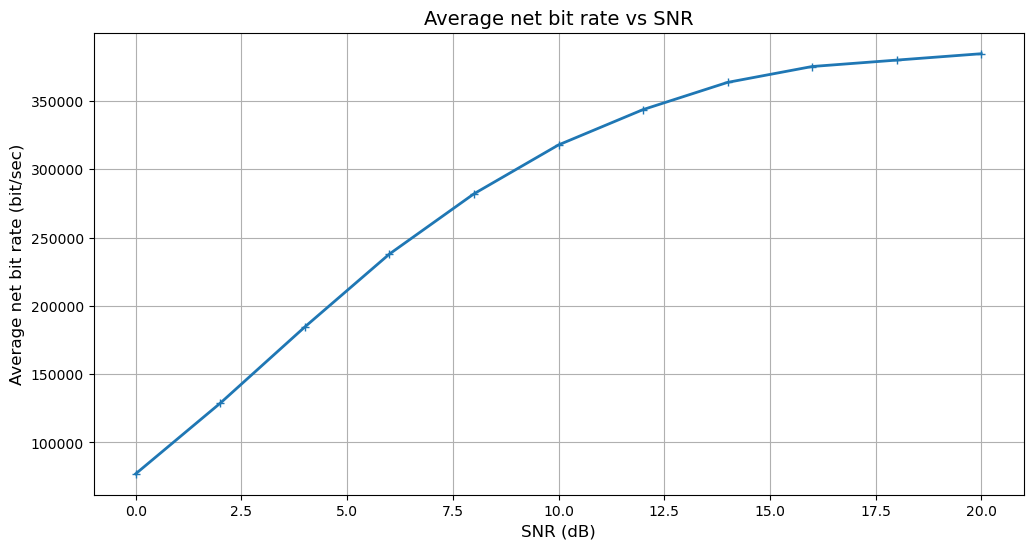

In [17]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(snrList, ave_reward, marker='+', linestyle='-', linewidth=2)

# Add labels and title
plt.title('Average net bit rate vs SNR', fontsize=14)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Average net bit rate (bit/sec)', fontsize=12)

# Add grid for better visualization
plt.grid(True)

# Save the plot
plt.savefig('P2P average_reward_vs_snr(db).png', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()